<center>
<p><img src="https://mcd.unison.mx/wp-content/themes/awaken/img/logo_mcd.png" width="150">
</p>



<h1>Curso Ingeniería de Características</h1>

<h3>Datos numéricos</h3>


<p> Julio Waissman Vilanova </p>
<p>
<img src="https://identidadbuho.unison.mx/wp-content/uploads/2019/06/letragrama-cmyk-72.jpg" width="150">
</p>


<a target="_blank" href="https://colab.research.google.com/github/mcd-unison/ing-caract/blob/main/ejemplos/tipos/python/categoricos.ipynb"><img src="https://i.ibb.co/2P3SLwK/colab.png"  style="padding-bottom:5px;"  width="30" /> Ejecuta en Colab</a>

</center>

Esta libreta es la transcripción del tutorial:

# [Handling Categorical Data in Python Tutorial](https://www.datacamp.com/tutorial/categorical-data)

de DataCamp. 

En el tutorial dicen que:

> This tutorial covers the operations you have perform on categorical data before it can be used in an ML algorithm. But there is more to it. You will also have to clean your data. If you would like to know more about this process, be sure to take a look at DataCamp's Cleaning Data in Python course.

A partir de aqui, todo el resto de la libreta es simplemente un copiar pegar, que nos va a servir para poder ejecutar cada uno de los códigos durante la clase.

## Identifying Categorical Data: Nominal, Ordinal and Continuous

Categorical features can only take on a limited, and usually fixed, number of possible values. For example, if a dataset is about information related to users, then you will typically find features like country, gender, age group, etc. 

Alternatively, if the data you're working with is related to products, you will find features like product type, manufacturer, seller and so on. These are all categorical features in your dataset. 

These features are typically stored as text values which represent various traits of the observations. For example, gender is described as Male (M) or Female (F), product type could be described as electronics, apparels, food etc. 

**Note** that these type of features where the categories are only labeled without any order of precedence are called nominal features. 

Features which have some order associated with them are called ordinal features. For example, a feature like economic status, with three categories: low, medium and high, which have an order associated with them. 

There are also continuous features. These are numeric variables that have an infinite number of values between any two values. A continuous variable can be numeric or a date/time. 

Regardless of what the value is used for, the challenge is determining how to use this data in the analysis because of the following constraints:

1. Categorical features may have a very large number of levels, known as high cardinality, (for example, cities or URLs), where most of the levels appear in a relatively small number of instances.

2. Many machine learning models, such as regression or SVM, are algebraic. This means that their input must be numerical. To use these models, categories must be transformed into numbers first, before you can apply the learning algorithm on them.

3. While some ML packages or libraries might transform categorical data to numeric automatically based on some default embedding method, many other ML packages don’t support such inputs.

4. For the machine, categorical data doesn’t contain the same context or information that humans can easily associate and understand. For example, when looking at a feature called City with three cities New York, New Jersey and New Delhi, humans can infer that New York is closely related to New Jersey as they are from same country, while New York and New Delhi are much different. But for the model, New York, New Jersey and New Delhi, are just three different levels (possible values) of the same feature City. If you don’t specify the additional contextual information, it will be impossible for the model to differentiate between highly different levels.

You therefore are faced with the challenge of figuring out how to turn these text values into numerical values for further processing and unmask lots of interesting information which these features might hide. Typically, any standard work-flow in feature engineering involves some form of transformation of these categorical values into numeric labels and then applying some encoding scheme on these values.

## General Exploration Steps for Categorical Data

In this section, you'll focus on dealing with categorical features in the `pnwflights14` dataset, but you can apply the same procedure to all kinds of datasets. 

`pnwflights14` is a modified version of Hadley Wickham's `nycflights13` dataset and contains information about all flights that departed from the two major airports of the Pacific Northwest (PNW), SEA in Seattle and PDX in Portland, in 2014: 162,049 flights in total. 

To help understand what causes delays, it also includes a number of other useful datasets:

- `weather`: the hourly meterological data for each airport

- `planes`: constructor information about each plan`

- `airports`: airport names and locations

- `airlines`: translation between two letter carrier codes and names

The datasets can be found [here](https://github.com/ismayc/pnwflights14). Since it's always a good idea to understand before starting working on it, you'll briefly explore the data! 

In [1]:
import pandas as pd
import numpy as np
import copy

df_flights = pd.read_csv('https://raw.githubusercontent.com/ismayc/pnwflights14/master/data/flights.csv')
df_flights.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2014,1,1,1.0,96.0,235.0,70.0,AS,N508AS,145,PDX,ANC,194.0,1542,0.0,1.0
1,2014,1,1,4.0,-6.0,738.0,-23.0,US,N195UW,1830,SEA,CLT,252.0,2279,0.0,4.0
2,2014,1,1,8.0,13.0,548.0,-4.0,UA,N37422,1609,PDX,IAH,201.0,1825,0.0,8.0
3,2014,1,1,28.0,-2.0,800.0,-23.0,US,N547UW,466,PDX,CLT,251.0,2282,0.0,28.0
4,2014,1,1,34.0,44.0,325.0,43.0,AS,N762AS,121,SEA,ANC,201.0,1448,0.0,34.0


In [ ]:
df_flights.info()

As you can see, columns like `year`, `month` and `day` are read as integers, and `dep_time`, `dep_delay` etc. are read as floats.`

The columns with `object dtype` are the possible categorical features in your dataset. The reason why you would say that these categorical features are  *possible* is because you shouldn't not completely rely on `.info()` to get the real data type of the values of a feature, as some missing values that are represented as strings in a continuous feature can coerce it to read them as object dtypes. 

That's why it's always a good idea to investigate your raw dataset thoroughly and then think about cleaning it. 

One of the most common ways to analyze the relationship between a categorical feature and a continuous feature is to plot a boxplot. 

The boxplot is a simple way of representing statistical data on a plot in which a rectangle is drawn to represent the second and third quartiles, usually with a vertical line inside to indicate the median value. The lower and upper quartiles are shown as horizontal lines at either side of the rectangle.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Boxplot


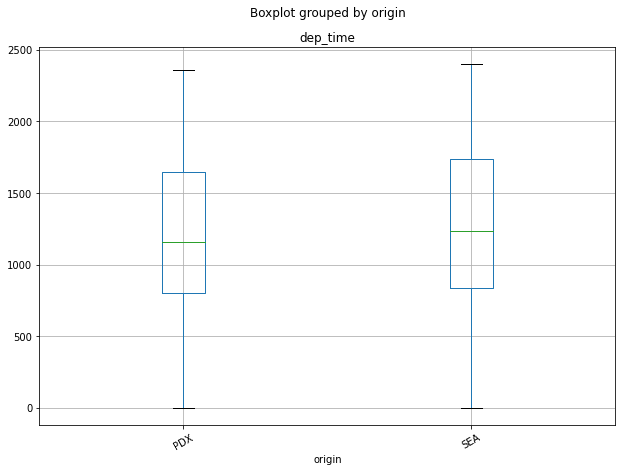

In [3]:
df_flights.boxplot('dep_time','origin', rot = 30, figsize=(10,7))
print("Boxplot")

As you will only be dealing with categorical features in this tutorial, it's better to filter them out. You can create a separate DataFrame consisting of only these features by running the following command. 

The method `.copy() is used here so that any changes made in new DataFrame don't get reflected in the original one.

In [5]:
cat_df_flights = df_flights.select_dtypes(include=['object']).copy()
cat_df_flights.head()

,carrier,tailnum,origin,dest
0,AS,N508AS,PDX,ANC
1,US,N195UW,SEA,CLT
2,UA,N37422,PDX,IAH
3,US,N547UW,PDX,CLT
4,AS,N762AS,SEA,ANC


One of the most common data pre-processing steps is to check for null values in the dataset. 

In [6]:
cat_df_flights.describe()

,carrier,tailnum,origin,dest
count,162049,161801,162049,162049
unique,11,3022,2,71
top,AS,N223AG,SEA,SFO
freq,62460,755,108714,12809


Let's also check the column-wise distribution of null values:

In [7]:
print(cat_df_flights.isna().sum())

carrier      0
tailnum    248
origin       0
dest         0
dtype: int64


It seems that only the tailnum column has null values. You can do a mode imputation for those null values. The function `fillna() is handy for such operations.

In [11]:
cat_df_flights.tailnum.value_counts().index[0]

'N223AG'

In [13]:
cat_df_flights = cat_df_flights\
    .fillna(
        cat_df_flights['tailnum'].value_counts().index[0]
    )

In [14]:
print(cat_df_flights.isna().sum())

carrier    0
tailnum    0
origin     0
dest       0
dtype: int64


Another Exploratory Data Analysis (EDA) step that you might want to do on categorical features is the frequency distribution of categories within the feature, which can be done with the `.value_counts` method as described earlier.

In [15]:
cat_df_flights['carrier'].value_counts()

AS    62460
WN    23355
OO    18710
DL    16716
UA    16671
AA     7586
US     5946
B6     3540
VX     3272
F9     2698
HA     1095
Name: carrier, dtype: int64

Visual exploration is the most effective way to extract information between variables. 

Below is a basic template to plot a barplot of the frequency distribution of a categorical feature using the `seaborn` package, which shows the frequency distribution of the carrier column. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


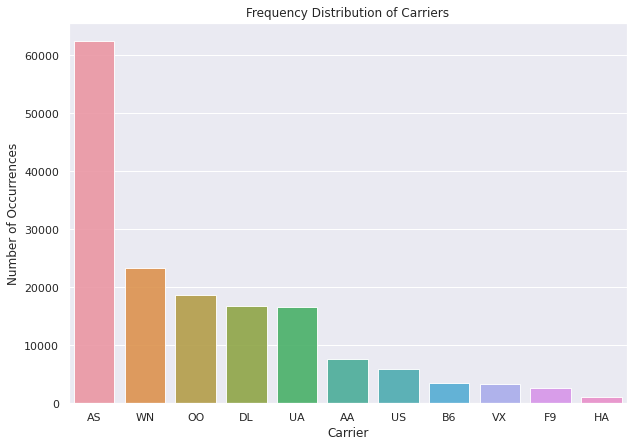

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

carrier_count = cat_df_flights['carrier'].value_counts()

plt.figure(figsize=(10, 7))
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)

plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.show()

## Encoding Categorical Data

You will now learn different techniques to encode the categorical features to numeric quantities. To keep it simple, you will apply these encoding methods only on the carrier column. However, the same approach can be extended to all columns. The techniques that you'll cover are the following:

- Replacing values
- Encoding labels
- One-Hot encoding
- Binary encoding
- Backward difference encoding
- Miscellaneous features
 


### Replace Values

Let's start with the most basic method, which is just replacing the categories with the desired numbers. This can be achieved with the help of the replace() function in pandas. The idea is that you have the liberty to choose whatever numbers you want to assign to the categories according to the business use case. You will now create a dictionary which contains mapping numbers for each category in the carrier column:

In [18]:
replace_map = {
    'carrier': {
        'AA': 1, 'AS': 2, 'B6': 3, 'DL': 4,
        'F9': 5, 'HA': 6, 'OO': 7, 'UA': 8, 
        'US': 9, 'VX': 10, 'WN': 11
    }
}

Note that defining a mapping via a hard coded dictionary is easy when the number of categories is low, like in this case which is 11. 

You can achieve the same mapping with the help of dictionary comprehensions as shown below. This will be useful when the categories count is high and you don't want to type out each mapping. 

You will store the category names in a list called labels and then zip it to a seqeunce of numbers and iterate over it.

In [19]:
labels = cat_df_flights['carrier']\
    .astype('category')\
    .cat.categories.tolist()


replace_map_comp = {
    'carrier' : {k: v for k,v in zip(labels, list(range(1, len(labels) + 1)))}
}

print(replace_map_comp)

{'carrier': {'AA': 1, 'AS': 2, 'B6': 3, 'DL': 4, 'F9': 5, 'HA': 6, 'OO': 7, 'UA': 8, 'US': 9, 'VX': 10, 'WN': 11}}


Throughout this tutorial, you will be making a copy of the dataset via the `.copy()` method to practice each encoding technique to ensure that the original DataFrame stays intact and whatever changes you are doing happen only in the copied one.

In [20]:
cat_df_flights_replace = cat_df_flights.copy()

cat_df_flights_replace.replace(replace_map_comp, inplace=True)
display(cat_df_flights_replace.head())

print("\nVamos a ver los tipos de las variables ahora")
display(cat_df_flights_replace.dtypes)

,carrier,tailnum,origin,dest
0,2,N508AS,PDX,ANC
1,9,N195UW,SEA,CLT
2,8,N37422,PDX,IAH
3,9,N547UW,PDX,CLT
4,2,N762AS,SEA,ANC



Vamos a ver los tipos de las variables ahora


carrier     int64
tailnum    object
origin     object
dest       object
dtype: object

in Python, it's a good practice to typecast categorical features to a category dtype because they make the operations on such columns much faster than the object dtype. You can do the typecasting by using `.astype()` method on your columns like shown below:

In [21]:
cat_df_flights_lc = cat_df_flights.copy()

cat_df_flights_lc['carrier'] = cat_df_flights_lc['carrier'].astype('category')
cat_df_flights_lc['origin'] = cat_df_flights_lc['origin'].astype('category')                                                              

cat_df_flights_lc.dtypes

carrier    category
tailnum      object
origin     category
dest         object
dtype: object

You can validate the faster operation of the category dtype by timing the execution time of the same operation done on a DataFrame with columns as category dtype and object dtype. 

Let's say you want to calculate the number of flights for each carrier from each origin places, you can use the .groupby() and .count() methods on your DataFrame to do so.

In [22]:
#DataFrame with object dtype columns
%timeit cat_df_flights.groupby(['origin','carrier']).count() 

41.1 ms ± 789 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [23]:
#DataFrame with category dtype columns
%timeit cat_df_flights_lc.groupby(['origin','carrier']).count() 

24.8 ms ± 817 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Label Encoding

Another approach is to encode categorical values with a technique called *label encoding*, which allows you to convert each value in a column to a number. 

Numerical labels are always between 0 and n_categories-1. You can do label encoding via attributes .cat.codes on your DataFrame's column.

In [24]:
cat_df_flights_lc['carrier'] = cat_df_flights_lc['carrier'].cat.codes
cat_df_flights_lc.head()

,carrier,tailnum,origin,dest
0,1,N508AS,PDX,ANC
1,8,N195UW,SEA,CLT
2,7,N37422,PDX,IAH
3,8,N547UW,PDX,CLT
4,1,N762AS,SEA,ANC


Sometimes, you might just want to encode a bunch of categories within a feature to some numeric value and encode all the other categories to some other numeric value. 

You could do this by using numpy's `where()` function like shown below. You will encode all the US carrier flights to value 1 and other carriers to value 0. This will create a new column in your DataFrame with the encodings.`

Later, if you want to drop the original column, you can do so by using the `drop()` function in pandas.

In [25]:
cat_df_flights_specific = cat_df_flights.copy()

cat_df_flights_specific['US_code'] = np.where(
    cat_df_flights_specific['carrier'].str.contains('US'), 1, 0
)

cat_df_flights_specific.head()

,carrier,tailnum,origin,dest,US_code
0,AS,N508AS,PDX,ANC,0
1,US,N195UW,SEA,CLT,1
2,UA,N37422,PDX,IAH,0
3,US,N547UW,PDX,CLT,1
4,AS,N762AS,SEA,ANC,0


You can achieve the same label encoding using scikit-learn's `LabelEncoder`:

In [26]:
from sklearn.preprocessing import LabelEncoder


cat_df_flights_sklearn = cat_df_flights.copy()

lb_make = LabelEncoder()
cat_df_flights_sklearn['carrier_code'] = lb_make.fit_transform(cat_df_flights['carrier'])

cat_df_flights_sklearn.head() 

,carrier,tailnum,origin,dest,carrier_code
0,AS,N508AS,PDX,ANC,1
1,US,N195UW,SEA,CLT,8
2,UA,N37422,PDX,IAH,7
3,US,N547UW,PDX,CLT,8
4,AS,N762AS,SEA,ANC,1


Label encoding is pretty much intuitive and straight-forward and may give you a good performance from your learning algorithm, but it has as disadvantage that the numerical values can be misinterpreted by the algorithm. Should the carrier US (encoded to 8) be given 8x more weight than the carrier AS (encoded to 1)? 

To solve this issue there is another popular way to encode the categories via something called one-hot encoding.

### One-Hot encoding

The basic strategy is to convert each category value into a new column and assign a 1 or 0 (True/False) value to the column. This has the benefit of not weighting a value improperly. 

There are many libraries out there that support one-hot encoding but the simplest one is using pandas' `.get_dummies()` method. 

This function is named this way because it creates dummy/indicator variables (1 or 0). 

There are mainly three arguments important here, the first one is the DataFrame you want to encode on, second being the columns argument which lets you specify the columns you want to do encoding on, and third, the prefix argument which lets you specify the prefix for the new columns that will be created after encoding.

In [27]:
cat_df_flights_onehot = cat_df_flights.copy()

cat_df_flights_onehot = pd.get_dummies(
    cat_df_flights_onehot, 
    columns=['carrier'], 
    prefix = ['carrier']
)

cat_df_flights_onehot.head()

,tailnum,origin,dest,carrier_AA,carrier_AS,carrier_B6,carrier_DL,carrier_F9,carrier_HA,carrier_OO,carrier_UA,carrier_US,carrier_VX,carrier_WN
0,N508AS,PDX,ANC,0,1,0,0,0,0,0,0,0,0,0
1,N195UW,SEA,CLT,0,0,0,0,0,0,0,0,1,0,0
2,N37422,PDX,IAH,0,0,0,0,0,0,0,1,0,0,0
3,N547UW,PDX,CLT,0,0,0,0,0,0,0,0,1,0,0
4,N762AS,SEA,ANC,0,1,0,0,0,0,0,0,0,0,0


As you can see, the column `carrier_AS` gets value 1 at the 0th and 4th observation points as those points had the AS category labeled in the original DataFrame. Likewise for other columns also. 

`scikit-learn` also supports one hot encoding via `LabelBinarizer` and `OneHotEncoder` in its preprocessing module (check out the details here). 

Just for the sake of practicing you will do the same encoding via `LabelBinarizer`:

In [28]:
cat_df_flights_onehot_sklearn = cat_df_flights.copy()

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

lb_results = lb.fit_transform(
    cat_df_flights_onehot_sklearn['carrier']
)
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)

lb_results_df.head()

,AA,AS,B6,DL,F9,HA,OO,UA,US,VX,WN
0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,0


Note that this `lb_results_df` resulted in a new DataFrame with only the one hot encodings for the feature carrier. 

This needs to be concatenated back with the original DataFrame, which can be done via pandas' `.concat()` method. The axis argument is set to 1 as you want to merge on columns.

In [29]:
result_df = pd.concat(
    [
        cat_df_flights_onehot_sklearn, 
        lb_results_df
    ], 
    axis=1
)

result_df.head()

,carrier,tailnum,origin,dest,AA,AS,B6,DL,F9,HA,OO,UA,US,VX,WN
0,AS,N508AS,PDX,ANC,0,1,0,0,0,0,0,0,0,0,0
1,US,N195UW,SEA,CLT,0,0,0,0,0,0,0,0,1,0,0
2,UA,N37422,PDX,IAH,0,0,0,0,0,0,0,1,0,0,0
3,US,N547UW,PDX,CLT,0,0,0,0,0,0,0,0,1,0,0
4,AS,N762AS,SEA,ANC,0,1,0,0,0,0,0,0,0,0,0


While one-hot encoding solves the problem of unequal weights given to categories within a feature, it is not very useful when there are many categories, as that will result in formation of as many new columns, which can result in the curse of dimensionality. 

The concept of the *curse of dimensionality* discusses that in high-dimensional spaces some things just stop working properly.

### Binary Encoding

This technique is not as intuitive as the previous ones. In this technique, first the categories are encoded as ordinal, then those integers are converted into binary code, then the digits from that binary string are split into separate columns. 

This encodes the data in fewer dimensions than one-hot. You can do binary encoding via a number of ways but the simplest one is using the [`category_encoders`](https://contrib.scikit-learn.org/category_encoders) library. You can install `category_encoders` via 

````bash
pip install category_encoders 
````

You have to first import the `category_encoders` library after installing it. Invoke the `BinaryEncoder` function by specifying the columns you want to encode and then call the `.fit_transform()` method on it with the DataFrame as the argument.

In [30]:
!pip install category_encoders 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.3 MB/s 


In [31]:
import category_encoders as ce

cat_df_flights_ce = cat_df_flights.copy()

encoder = ce.BinaryEncoder(cols=['carrier'])

df_binary = encoder.fit_transform(cat_df_flights_ce)

df_binary.head()

,carrier_0,carrier_1,carrier_2,carrier_3,tailnum,origin,dest
0,0,0,0,1,N508AS,PDX,ANC
1,0,0,1,0,N195UW,SEA,CLT
2,0,0,1,1,N37422,PDX,IAH
3,0,0,1,0,N547UW,PDX,CLT
4,0,0,0,1,N762AS,SEA,ANC


Notice that four new columns are created in place of the carrier column with binary encoding for each category in the feature. 

Note that category_encoders is a very useful library for encoding categorical columns. Not only does it support one-hot, binary and label encoding, but also other advanced encoding methods like Helmert contrast, polynomial contrast, backward difference, etc.

### Backward Difference Encoding

This technique falls under the contrast coding system for categorical features. A feature of K categories, or levels, usually enters a regression as a sequence of K-1 dummy variables. 

In backward difference coding, the mean of the dependent variable for a level is compared with the mean of the dependent variable for the prior level. 

This type of coding may be useful for a nominal or an ordinal variable. If you want to learn other contrast coding methods you can check out [this resource](https://www.statsmodels.org/dev/contrasts.html). 

The code structure is pretty much the same as any method in the category_encoders library, just this time you will call `BackwardDifferenceEncoder` from it:

In [32]:
encoder = ce.BackwardDifferenceEncoder(cols=['carrier'])
df_bd = encoder.fit_transform(cat_df_flights_ce)

df_bd.head()

,intercept,carrier_0,carrier_1,carrier_2,carrier_3,carrier_4,carrier_5,carrier_6,carrier_7,carrier_8,carrier_9,tailnum,origin,dest
0,1,-0.909091,-0.818182,-0.727273,-0.636364,-0.545455,-0.454545,-0.363636,-0.272727,-0.181818,-0.090909,N508AS,PDX,ANC
1,1,0.090909,-0.818182,-0.727273,-0.636364,-0.545455,-0.454545,-0.363636,-0.272727,-0.181818,-0.090909,N195UW,SEA,CLT
2,1,0.090909,0.181818,-0.727273,-0.636364,-0.545455,-0.454545,-0.363636,-0.272727,-0.181818,-0.090909,N37422,PDX,IAH
3,1,0.090909,-0.818182,-0.727273,-0.636364,-0.545455,-0.454545,-0.363636,-0.272727,-0.181818,-0.090909,N547UW,PDX,CLT
4,1,-0.909091,-0.818182,-0.727273,-0.636364,-0.545455,-0.454545,-0.363636,-0.272727,-0.181818,-0.090909,N762AS,SEA,ANC


The interesting thing here is that you can see that the results are not the standard 1’s and 0’s you saw in the dummy encoding examples but rather regressed continuous values.

### Miscellaneous Features

Sometimes you may encounter categorical feature columns which specify the ranges of values for observation points, for example, the age column might be described in the form of categories like 0-20, 20-40 and so on. 

While there can be a lot of ways to deal with such features, the most common ones are either split these ranges into two separate columns or replace them with some measure like the mean of that range. 

You will first create a dummy DataFrame which has just one feature age with ranges specified using the pandas DataFrame function. 

Then you will split the column on the delimeter - into two columns start and end using split() with a lambda() function. If you want to learn more about lambda functions, check out [this tutorial](https://www.datacamp.com/tutorial/functions-python-tutorial).

In [ ]:
dummy_df_age = pd.DataFrame({'age': ['0-20', '20-40', '40-60','60-80']})

dummy_df_age['start'], dummy_df_age['end'] = zip(
    *dummy_df_age['age'].map(lambda x: x.split('-'))
)

dummy_df_age.head()

To replace the range with its mean, you will write a `split_mean()` function which basically takes one range at a time, splits it, then calculates the mean and returns it. To apply a certain function to all the entities of a column you will use the `.apply()` method:

In [ ]:
dummy_df_age = pd.DataFrame({'age': ['0-20', '20-40', '40-60','60-80']})

def split_mean(x):
    split_list = x.split('-')
    mean = (float(split_list[0]) + float(split_list[1])) / 2
    return mean

dummy_df_age['age_mean'] = dummy_df_age['age'].apply(lambda x: split_mean(x))

dummy_df_age.head()